In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoly
# Read the shapefile
# roads_data = gpd.read_file('osm/roads.shp')
roads_data.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,8656088,Park Rd,None,residential,0,0,NaN,"LINESTRING (90.42258 23.79758, 90.42238 23.798..."
1,8656089,Embassy Rd,None,residential,0,0,NaN,"LINESTRING (90.41891 23.79768, 90.42034 23.798..."
2,8656151,Dutabash Rd,None,residential,0,0,NaN,"LINESTRING (90.41857 23.79918, 90.41941 23.799..."
3,8656152,Road 1,None,residential,0,0,NaN,"LINESTRING (90.41926 23.80001, 90.42059 23.800..."
4,8656154,Road 2,None,residential,0,0,NaN,"LINESTRING (90.42049 23.80098, 90.42088 23.801..."


In [ ]:
#Looking at the N1 and N2 it shows that the N1 is running from Dhaka to Chittagong according to wikipedia iThe highway is known along various stretches as the Chittagong–Cox's Bazar Highway and the Cox's Bazar–Teknaf Highway. For this reason we will take in the following key words 'Chittagong', 'Coxs', 'Bazar', 'Teknaf' and 'N1'
#For the N2 the wiki indicates that sections of the highway are known as the Dhaka–Sylhet Highway and the Sylhet-Tamabil Highway. For this reason we will be looking at the key words 'Sylhet-Tamabil', 'Dhaka–Sylhet', N2

In [151]:
#We have checked to see what the roads are actually named. This was done by checking common names the N-roads have been given on wikipedia and google maps to then identify them in the shape file. For example the N1 was also often mentioned as ... cox's highway or cox bazar. For this reason if you only gave the input N1 you would only get a small piece of the entire map. The only part of the map that we did not manage to get was the N 207, as can be seen below we are able to find it in the dataframe if we look up 'Moulvibazar', however this does not give us the road when we give it to our algorithm as code. 
# List of keywords
keywords = ['Moulvibazar']

# Fill NaN values with an empty string in the 'name' column
roads_data['name'] = roads_data['name'].fillna('')

# Filter the dataframe based on keywords
filtered_roads_data = roads_data[roads_data['name'].str.contains('|'.join(keywords), case=False)]

# Show the filtered dataframe
filtered_roads_data.ref.unique()




array(['N 207'], dtype=object)

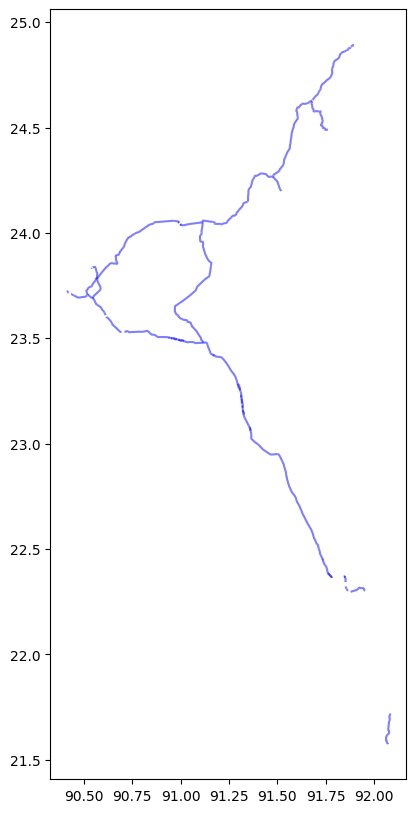

In [108]:
# From looking for the roads, the previous key roads have been identified in the roads_data. This will show the road network so we can check if it is correct.  
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
roads_data['name'] = roads_data['name'].str.strip()
roads_data['ref'] = roads_data['ref'].astype(str)

# List of key roads
keyroads = ['Dhaka-Sylhet Highway', 'Dhaka - Sylhet Highway', 'Sylhet - Tamabil Hwy', 
            'Dhaka Sylhet Highway', 'Dhaka-Sylhet', 'Dhaka-Chittagong Highway', 
            'Dhaka–Chittagong Highway', 'Dhaka-Chittagong Hwy', "Chittagong - Cox's Bazar Highway", 
            "Chittagong - Coxs Bazar Hwy", 'Dhaka - Chittagong Highway', 'Dhaka-Chittagong', 
            "Chittagong Cox's Bazar Highway", "Chittagong-Cox's Bazar Highway", 'Comilla-Sylhet Highway', 'Bhulta Highway', 'Chunurghat - Shaistaganj Hwy', 'N207', 'Sylhet - Moulvibazar Road']


# Read the shapefile containing road geometries
roads_data = gpd.read_file('osm/roads.shp')

# Filter roads based on key roads
keyroads_data = roads_data[roads_data['name'].isin(keyroads)]

# Find intersections
intersections = []
for i, road1 in keyroads_data.iterrows():
    for j, road2 in keyroads_data.iterrows():
        if i != j:
            intersection = road1['geometry'].intersection(road2['geometry'])
            if not intersection.is_empty:
                if isinstance(intersection, MultiPolygon):
                    intersections.extend(list(intersection))
                else:
                    intersections.append(intersection)

# Plot intersections
fig, ax = plt.subplots(figsize=(10, 10))
keyroads_data.plot(ax=ax, color='blue', alpha=0.5)
for intersection in intersections:
    if isinstance(intersection, MultiPolygon):
        for polygon in intersection:
            ax.plot(*polygon.exterior.xy, color='red')
    elif isinstance(intersection, Polygon):
        ax.plot(*intersection.exterior.xy, color='red')
plt.show()




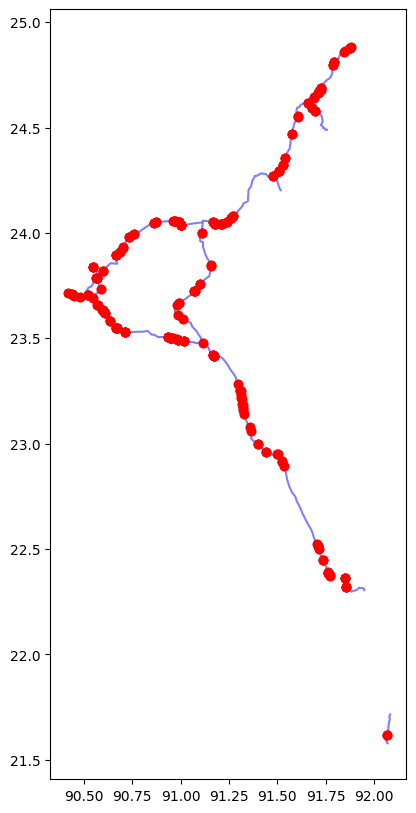

In [112]:
#Below the code checks for all the previously identified key roads which are now plotted on a map and red dots indicate the intersections, there are too many so we have to check what happened. 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint

# List of key roads
keyroads = ['Dhaka-Sylhet Highway', 'Dhaka - Sylhet Highway', 'Sylhet - Tamabil Hwy', 
            'Dhaka Sylhet Highway', 'Dhaka-Sylhet', 'Dhaka-Chittagong Highway', 
            'Dhaka–Chittagong Highway', 'Dhaka-Chittagong Hwy', "Chittagong - Cox's Bazar Highway", 
            "Chittagong - Coxs Bazar Hwy", 'Dhaka - Chittagong Highway', 'Dhaka-Chittagong', 
            "Chittagong Cox's Bazar Highway", "Chittagong-Cox's Bazar Highway", 'Comilla-Sylhet Highway', 'Bhulta Highway', 'Chunurghat - Shaistaganj Hwy', 'N207', 'Sylhet - Moulvibazar Road']
# Read the shapefile containing road geometries
roads_data = gpd.read_file('osm/roads.shp')

# Filter roads based on key roads
keyroads_data = roads_data[roads_data['name'].isin(keyroads)]

# Find intersections
intersections = []
for i, road1 in keyroads_data.iterrows():
    for j, road2 in keyroads_data.iterrows():
        if i != j:
            intersection = road1['geometry'].intersection(road2['geometry'])
            if not intersection.is_empty:
                if intersection.geom_type == 'Point':
                    intersections.append(intersection)
                elif intersection.geom_type == 'MultiPoint':
                    for point in intersection.geoms:
                        intersections.append(point)

# Plot roads
fig, ax = plt.subplots(figsize=(10, 10))
keyroads_data.plot(ax=ax, color='blue', alpha=0.5)

# Plot intersection points as red dots
for intersection in intersections:
    if isinstance(intersection, Point):
        ax.plot(intersection.x, intersection.y, 'ro')
    elif isinstance(intersection, MultiPoint):
        for point in intersection:
            ax.plot(point.x, point.y, 'ro')

plt.show()


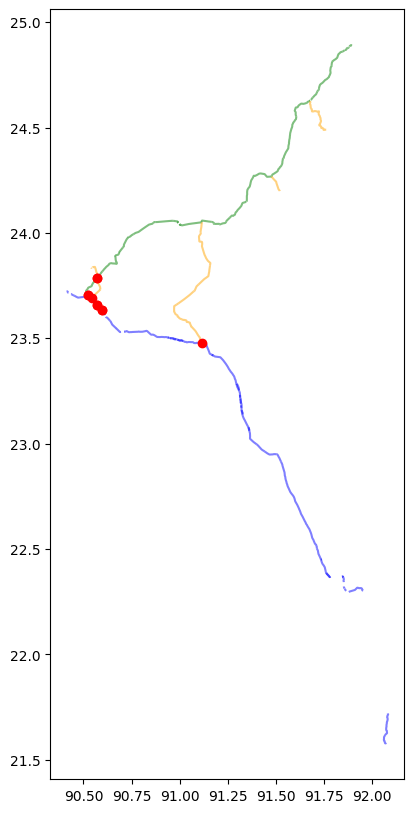

In [153]:
#Plotting all the points and ensuring that the N1 and N2 roads can not get an intersection with themselves, this unfortunately also causes the side roads to not get every intersection. 

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString

# List of key roads forming N1 and N2
n1_roads = ['Dhaka-Chittagong Highway', 'Dhaka–Chittagong Highway', 'Dhaka-Chittagong Hwy',
            "Chittagong - Cox's Bazar Highway", "Chittagong - Coxs Bazar Hwy", 'Dhaka - Chittagong Highway',
            'Dhaka-Chittagong', "Chittagong Cox's Bazar Highway", "Chittagong-Cox's Bazar Highway"]
n2_roads = ['Dhaka-Sylhet Highway', 'Dhaka - Sylhet Highway', 'Sylhet - Tamabil Hwy', 
            'Dhaka Sylhet Highway', 'Dhaka-Sylhet']

# Additional roads
additional_roads = ['Comilla-Sylhet Highway', 'Bhulta Highway', 'Chunurghat - Shaistaganj Hwy', 'Moulvibazar', 'Sylhet - Moulvibazar Road']

# Read the shapefile containing road geometries
roads_data = gpd.read_file('osm/roads.shp')

# Filter roads based on specified roads
n1_data = roads_data[roads_data['name'].isin(n1_roads)]
n2_data = roads_data[roads_data['name'].isin(n2_roads)]
additional_data = roads_data[roads_data['name'].isin(additional_roads)]

# Plot roads
fig, ax = plt.subplots(figsize=(10, 10))

# Plot N1 roads in blue
n1_data.plot(ax=ax, color='blue', alpha=0.5)

# Plot N2 roads in green
n2_data.plot(ax=ax, color='green', alpha=0.5)

# Plot additional roads in orange
additional_data.plot(ax=ax, color='orange', alpha=0.5)

# Find and plot intersections between N1, N2, and additional roads
for i, road1 in n1_data.iterrows():
    for j, road2 in n2_data.iterrows():
        intersection = road1['geometry'].intersection(road2['geometry'])
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                ax.plot(*intersection.xy, 'ro')
            elif intersection.geom_type == 'MultiPoint':
                for point in intersection:
                    ax.plot(*point.xy, 'ro')

for i, road1 in n1_data.iterrows():
    for j, road2 in additional_data.iterrows():
        intersection = road1['geometry'].intersection(road2['geometry'])
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                ax.plot(*intersection.xy, 'ro')
            elif intersection.geom_type == 'MultiPoint':
                for point in intersection:
                    ax.plot(*point.xy, 'ro')

for i, road1 in n2_data.iterrows():
    for j, road2 in additional_data.iterrows():
        intersection = road1['geometry'].intersection(road2['geometry'])
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                ax.plot(*intersection.xy, 'ro')
            elif intersection.geom_type == 'MultiPoint':
                for point in intersection:
                    ax.plot(*point.xy, 'ro')

plt.show()


ValueError: aspect must be finite and positive 

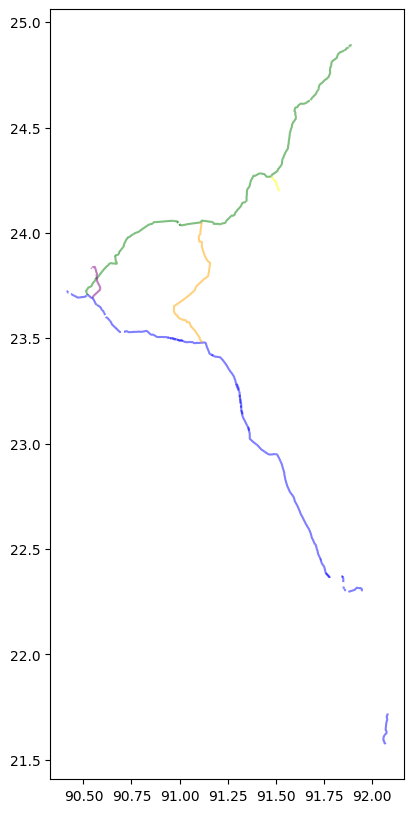

In [152]:
#Another attempt to fix that not all the roads get an intersection. Unfortunately this did not work as wished. 

import geopandas as gpd
import matplotlib.pyplot as plt

# List of key roads forming N1 and N2
n1_roads = ['Dhaka-Chittagong Highway', 'Dhaka–Chittagong Highway', 'Dhaka-Chittagong Hwy',
            "Chittagong - Cox's Bazar Highway", "Chittagong - Coxs Bazar Hwy", 'Dhaka - Chittagong Highway',
            'Dhaka-Chittagong', "Chittagong Cox's Bazar Highway", "Chittagong-Cox's Bazar Highway"]
n2_roads = ['Dhaka-Sylhet Highway', 'Dhaka - Sylhet Highway', 'Sylhet - Tamabil Hwy', 
            'Dhaka Sylhet Highway', 'Dhaka-Sylhet']

# Read the shapefile containing road geometries
roads_data = gpd.read_file('osm/roads.shp')

# Filter roads based on specified roads
n1_data = roads_data[roads_data['name'].isin(n1_roads)]
n2_data = roads_data[roads_data['name'].isin(n2_roads)]

# Filter roads for additional roads
n102_data = roads_data[roads_data['name'] == 'Comilla-Sylhet Highway']
n105_data = roads_data[roads_data['name'] == 'Bhulta Highway']
n204_data = roads_data[roads_data['name'] == 'Chunurghat - Shaistaganj Hwy']
n207_data = roads_data[roads_data['name'] == 'N 207']
n208_data = roads_data[roads_data['name'] == 'Sylhet - Moulvibazar Road']

# Plot roads
fig, ax = plt.subplots(figsize=(10, 10))

# Plot N1 roads in blue
n1_data.plot(ax=ax, color='blue', alpha=0.5)

# Plot N2 roads in green
n2_data.plot(ax=ax, color='green', alpha=0.5)

# Plot additional roads in orange
n102_data.plot(ax=ax, color='orange', alpha=0.5)
n105_data.plot(ax=ax, color='purple', alpha=0.5)
n204_data.plot(ax=ax, color='yellow', alpha=0.5)
n207_data.plot(ax=ax, color='brown', alpha=0.5)
n208_data.plot(ax=ax, color='white', alpha=0.5)

# Find and plot intersections between N1, N2, and additional roads
for i, road1 in n1_data.iterrows():
    for j, road2 in n2_data.iterrows():
        intersection = road1['geometry'].intersection(road2['geometry'])
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                ax.plot(*intersection.xy, 'ro')
            elif intersection.geom_type == 'MultiPoint':
                for point in intersection:
                    ax.plot(*point.xy, 'ro')

for additional_data in [n102_data, n105_data, n204_data, n207_data, n208_data]:
    for i, road1 in n1_data.iterrows():
        for j, road2 in additional_data.iterrows():
            intersection = road1['geometry'].intersection(road2['geometry'])
            if not intersection.is_empty:
                if intersection.geom_type == 'Point':
                    ax.plot(*intersection.xy, 'ro')
                elif intersection.geom_type == 'MultiPoint':
                    for point in intersection:
                        ax.plot(*point.xy, 'ro')

for additional_data in [n102_data, n105_data, n204_data, n207_data, n208_data]:
    for i, road1 in n2_data.iterrows():
        for j, road2 in additional_data.iterrows():
            intersection = road1['geometry'].intersection(road2['geometry'])
            if not intersection.is_empty:
                if intersection.geom_type == 'Point':
                    ax.plot(*intersection.xy, 'ro')
                elif intersection.geom_type == 'MultiPoint':
                    for point in intersection:
                        ax.plot(*point.xy, 'ro')
#
plt.show()
